# San Diego temperature history

## Objective
Obtain and present historical temperatures for San Diego from 1969 to 2019

## Description 
Temperature data is obtained from two sources:
* "Climate Change: Earth Surface Temperature Data" dataset, at Kaggle.com.
* http://www.worldweatheronline.com

The "Climate Change: Earth Surface Temperature Data" dataset contains data for 3000 cities from 1743 to 2013.  Multiple files were download, but only one for is used.  The applicable dataset is in the file:
* GlobalLandTemperaturesByMajorCity.csv (532 MB, 240,000 rows, 101 cities). To save space on github, this file is pruned to include only the San Diego data (135 KB).

The World Weather Online site provides historical data for $36 dollars. The data is monthly temperature averages from 2009 to 2019. The San Diego download is in the file:
* san-diego-monthly-temperature.csv (14 KB, 133 rows)

The data from both files will be combined into one data frame as follows:
* GlobalLandTemperaturesByMajorCity.csv: San Diego from 1969 to 2008
* san-diego-monthly-temperature.csv: from 2009 to 2019


## Obtain historical temperature data

In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

folder_name_1 = "resources/climate-change-earth-surface-temperature-data/"
san_diego_file_name_1 = "GlobalLandTemperaturesByCity.csv"
folder_name_2 = "resources/world-weather-online/"
san_diego_file_name_2 = "san-diego-monthly-temperature.csv"

In [2]:
# import the San Diego data from GlobalLandTemperaturesByMajorCity.csv
raw_data_san_diego_1 = pd.read_csv(folder_name_1 + san_diego_file_name_1)
san_diego_data_1 = raw_data_san_diego_1.loc[raw_data_san_diego_1['City'] == 'San Diego'] 

# replace the old "GlobalLandTemperaturesByCity.csv (which is 532 MB) with one that only contains San Diego data
san_diego_data_1.to_csv(folder_name_1 + san_diego_file_name_1, index=False)

# display
san_diego_data_1

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,13.116,2.586,San Diego,United States,32.95N,117.77W
1,1849-02-01,12.656,1.882,San Diego,United States,32.95N,117.77W
2,1849-03-01,13.551,2.035,San Diego,United States,32.95N,117.77W
3,1849-04-01,14.146,2.805,San Diego,United States,32.95N,117.77W
4,1849-05-01,13.543,1.882,San Diego,United States,32.95N,117.77W
...,...,...,...,...,...,...,...
1972,2013-05-01,17.635,0.445,San Diego,United States,32.95N,117.77W
1973,2013-06-01,18.632,0.338,San Diego,United States,32.95N,117.77W
1974,2013-07-01,19.929,0.367,San Diego,United States,32.95N,117.77W
1975,2013-08-01,20.076,0.522,San Diego,United States,32.95N,117.77W


In [3]:
# cull unnecessary columns
san_diego_data_1 = san_diego_data_1[['dt', 'AverageTemperature']]

# drop years before 1969 and after 2008
san_diego_data_1 = san_diego_data_1.loc[san_diego_data_1['dt'] >= '1969'] 
san_diego_data_1 = san_diego_data_1.loc[san_diego_data_1['dt'] < '2009'] 

# change the date format to only show the year
san_diego_data_1['dt'] = san_diego_data_1["dt"].str.split("-").str[0]

san_diego_data_1

,dt,AverageTemperature
1440,1969,14.225
1441,1969,11.930
1442,1969,12.579
1443,1969,14.543
1444,1969,15.772
...,...,...
1915,2008,21.066
1916,2008,21.199
1917,2008,20.638
1918,2008,18.488


In [4]:
# import the San Diego data from san-diego-monthly-temperature.csv
san_diego_data_2 = pd.read_csv(folder_name_2 + san_diego_file_name_2)

# display
san_diego_data_2

,loc_id,year,month,maxtempC,maxtempF,mintempC,mintempF,avgtempC,avgtempF,rainMM,...,avgwindgustKmph,visibilityKm,visibilityMiles,humidity,pressureMB,pressureInches,cloudcover,sun_hour,sun_days,uvindex
0,1,2009,1,18,64,12,54,15,58,4.35,...,17.0,10,6,57,1019.8,30.6,13,221.5,26,5
1,1,2009,2,16,60,11,51,13,55,19.53,...,17.8,10,6,67,1018.2,30.5,22,196.5,22,5
2,1,2009,3,17,63,10,50,13,56,0.31,...,14.4,10,6,68,1016.0,30.5,11,301.0,30,4
3,1,2009,4,18,64,11,52,14,57,1.21,...,15.5,10,6,68,1015.1,30.5,11,367.5,26,4
4,1,2009,5,20,68,12,54,16,60,0.19,...,11.7,10,6,73,1012.6,30.4,5,386.0,30,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,1,2019,8,25,78,20,68,24,76,1.90,...,11.7,10,6,69,1012.1,30.4,8,304.0,29,7
128,1,2019,9,24,76,19,67,23,73,17.10,...,12.1,10,6,66,1011.8,30.4,22,267.5,21,6
129,1,2019,10,23,74,19,66,22,72,0.20,...,10.9,10,6,52,1013.0,30.4,4,310.0,30,6
130,1,2019,11,21,71,16,61,20,68,113.60,...,13.3,10,5,58,1014.0,30.4,24,253.5,21,3


In [5]:
# cull unnecessary columns and rename to match the columns in san_diego_data_1
san_diego_data_2 = san_diego_data_2[['year', 'avgtempC']]
san_diego_data_2.columns = ['dt', 'AverageTemperature']
san_diego_data_2

,dt,AverageTemperature
0,2009,15
1,2009,13
2,2009,13
3,2009,14
4,2009,16
...,...,...
127,2019,24
128,2019,23
129,2019,22
130,2019,20


In [6]:
# concatenate the two data frames into one
temp_df = pd.concat([san_diego_data_1, san_diego_data_2])

# reset the index of the concatenated data frame
temp_df.reset_index(inplace=True)
temp_df

,index,dt,AverageTemperature
0,1440,1969,14.225
1,1441,1969,11.930
2,1442,1969,12.579
3,1443,1969,14.543
4,1444,1969,15.772
...,...,...,...
607,127,2019,24.000
608,128,2019,23.000
609,129,2019,22.000
610,130,2019,20.000


In [7]:
# create groupby, which will be used for averaging the monthly temperatures for each year
temp_group = temp_df.groupby(['dt'])
temp_yearly_mean = temp_group['AverageTemperature'].mean()

# create a temperature array for the y-axis of the plot
temp_array = temp_yearly_mean.values

# create a year array for the x-axis of the plot
year_array = np.arange(1969, 2019 + 1)

# verify both axes are the same length
print(f"Length of x-axis is {len(year_array)}")
print(f"Length of y-axis is {len(temp_array)}")

Length of x-axis is 51
Length of y-axis is 51


In [8]:
# Set linear regression line
slope, intercept, _, _, _ = linregress(year_array, temp_array)
fit = slope * year_array + intercept

## Present the historical temperature data

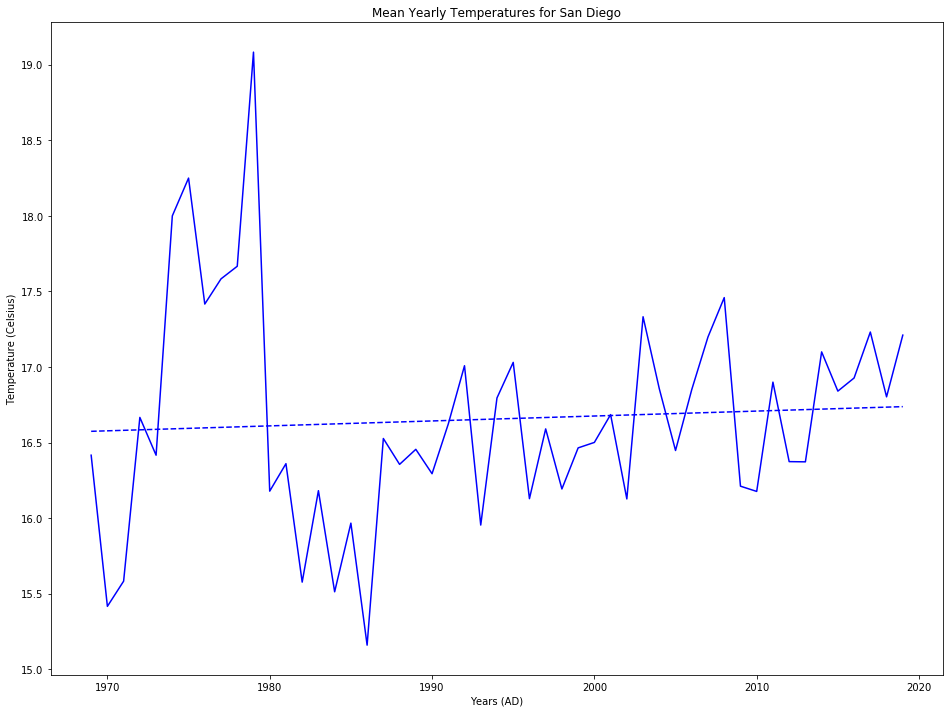

In [12]:
# plot the temperatures as a scatterplot
plt.figure(num=0,figsize=(16, 12))
plt.plot(year_array, temp_array, color="blue")

# plot the linear 
plt.plot(year_array, fit, 'b--')

plt.title("Mean Yearly Temperatures for San Diego")
plt.xlabel("Years (AD)")
plt.ylabel("Temperature (Celsius)")

# Save the Figure
plt.savefig("images/Fig 1.png")

In [ ]:
import plotly.express as px

df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", trendline="ols")
fig.show()

ax.plot(x_axis, fake, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

#### The above shows three outliers, India at year ~ 1860, Argentina at year ~ 1855, and United States as year ~ 2013. So these values will be set to the average temperature for that country, over the year range.

In [ ]:
# identify the object type for the above temperature axis; this will determine the method to be used 
# to set the outlier values (Pandas is different from Numpy)
print(f"The India_temp_axis is a {type(India_temp_axis)} object")

In [ ]:
# calculate the average temperature value for the three countries, and the other countries, while we're at it
Argentina_avg = temp_yearly_mean_pivot['AverageTemperature', "Argentina"].mean()
Australia_avg = temp_yearly_mean_pivot['AverageTemperature', "Australia"].mean()
Egypt_avg = temp_yearly_mean_pivot['AverageTemperature', "Egypt"].mean()
India_avg = temp_yearly_mean_pivot['AverageTemperature', "India"].mean()
Japan_avg = temp_yearly_mean_pivot['AverageTemperature', "Japan"].mean()
Kenya_avg = temp_yearly_mean_pivot['AverageTemperature', "Kenya"].mean()
Poland_avg = temp_yearly_mean_pivot['AverageTemperature', "Poland"].mean()
San_Diego_avg = temp_yearly_mean_pivot['AverageTemperature', "San Diego"].mean()
Sweden_avg = temp_yearly_mean_pivot['AverageTemperature', "Sweden"].mean()
United_States_avg = temp_yearly_mean_pivot['AverageTemperature', "United States"].mean()
Venezuela_avg = temp_yearly_mean_pivot['AverageTemperature', "Venezuela"].mean()

In [ ]:
# set the outlier temperatures for India, Argentina, and the United States to their mean temperature
India_temp_axis[India_temp_axis < 20] = India_avg
Argentina_temp_axis[Argentina_temp_axis < 13] = Argentina_avg
United_States_temp_axis[United_States_temp_axis > 11] = United_States_avg

#### To expand Fig 1, the temperature series will be normalized by subtracting the average temperature (taken over the 1850 to 2013 year range) for each country from each individual temperature.

In [ ]:
# define the axes for the Fig 2
beginning_year = 1849
ending_year = 2013

year_axis = np.arange(beginning_year, ending_year + 1)
Argentina_avg_temp_axis = temp_yearly_mean_pivot['AverageTemperature', "Argentina"].values - Argentina_avg
Australia_avg_temp_axis = temp_yearly_mean_pivot['AverageTemperature', "Australia"].values - Australia_avg
Egypt_avg_temp_axis = temp_yearly_mean_pivot['AverageTemperature', "Egypt"].values - Egypt_avg
India_avg_temp_axis = temp_yearly_mean_pivot['AverageTemperature', "India"].values - India_avg
Japan_avg_temp_axis = temp_yearly_mean_pivot['AverageTemperature', "Japan"].values - Japan_avg
Kenya_avg_temp_axis = temp_yearly_mean_pivot['AverageTemperature', "Kenya"].values - Kenya_avg
Poland_avg_temp_axis = temp_yearly_mean_pivot['AverageTemperature', "Poland"].values - Poland_avg
San_Diego_avg_temp_axis = temp_yearly_mean_pivot['AverageTemperature', "San Diego"].values - San_Diego_avg
Sweden_avg_temp_axis = temp_yearly_mean_pivot['AverageTemperature', "Sweden"].values - Sweden_avg
United_States_avg_temp_axis = temp_yearly_mean_pivot['AverageTemperature', "United States"].values - United_States_avg
Venezuela_avg_temp_axis = temp_yearly_mean_pivot['AverageTemperature', "Venezuela"].values - Venezuela_avg

In [ ]:
# plot the temperatures for Fig 2
plt.figure(figsize=(15, 8))
plt.plot(year_axis, Argentina_avg_temp_axis, color="blue", label="Argentina")
plt.plot(year_axis, Australia_avg_temp_axis, color="orange", label="Australia")
plt.plot(year_axis, Egypt_avg_temp_axis, color="green", label="Egypt")
plt.plot(year_axis, India_avg_temp_axis, color="green", label="India")
plt.plot(year_axis, Japan_avg_temp_axis, color="red", label="Japan")
plt.plot(year_axis, Kenya_avg_temp_axis, color="purple", label="Kenya")
plt.plot(year_axis, Poland_avg_temp_axis, color="brown", label="Poland")
plt.plot(year_axis, San_Diego_avg_temp_axis, color="black", label="San Diego")
plt.plot(year_axis, Sweden_avg_temp_axis, color="gray", label="Sweden")
plt.plot(year_axis, United_States_avg_temp_axis, color="olive", label="United States")
plt.plot(year_axis, Venezuela_avg_temp_axis, color="cyan", label="Venezuela")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

# move the graph to the left to make room for the legend
plt.xlim(beginning_year - 30, ending_year + 5)

plt.title("Fig 2. Normalized Mean Yearly Temperatures for Select Countries and San Diego")
plt.xlabel("Years (AD)")
plt.ylabel("Temperature (Celsius)")

# Save the Figure
plt.savefig("images/Fig 2.png")

### The above figure is too noisy. So only two lines will be drawn, San Diego and the average of the normalized countries.

In [ ]:
# calculate the series that is the average of the normalized country temperatures.

# first, replace NaN's with zero. This is necessary because the below country_avg_temp_axis will return
# NaN for any row in which any country temp is a NaN
Argentina_avg_temp_axis[np.isnan(Argentina_avg_temp_axis)] = 0
Australia_avg_temp_axis[np.isnan(Australia_avg_temp_axis)] = 0
Egypt_avg_temp_axis[np.isnan(Egypt_avg_temp_axis)] = 0
India_avg_temp_axis[np.isnan(India_avg_temp_axis)] = 0
Japan_avg_temp_axis[np.isnan(Japan_avg_temp_axis)] = 0
Kenya_avg_temp_axis[np.isnan(Kenya_avg_temp_axis)] = 0
Poland_avg_temp_axis[np.isnan(Poland_avg_temp_axis)] = 0
Sweden_avg_temp_axis[np.isnan(Sweden_avg_temp_axis)] = 0
United_States_avg_temp_axis[np.isnan(United_States_avg_temp_axis)] = 0
Venezuela_avg_temp_axis[np.isnan(Venezuela_avg_temp_axis)] = 0

# create a series that is the number on non-zero values in the country temperature series
reporting_country_count = temp_yearly_mean_pivot.astype(bool).sum(axis=1)

# create a series that is the sum of the country temps divided by the number on non-zero temps
country_avg_temp_axis = (Argentina_avg_temp_axis \
                         + Australia_avg_temp_axis \
                         + Egypt_avg_temp_axis \
                         + India_avg_temp_axis \
                         + Japan_avg_temp_axis \
                         + Kenya_avg_temp_axis \
                         + Poland_avg_temp_axis \
                         + Sweden_avg_temp_axis \
                         + United_States_avg_temp_axis \
                         + Venezuela_avg_temp_axis ) / reporting_country_count



In [ ]:
# plot the temperatures for Fig 3
plt.figure(figsize=(15, 8))
plt.plot(year_axis, country_avg_temp_axis, color="red", label="Country Average")
plt.plot(year_axis, San_Diego_avg_temp_axis, color="cornflowerblue", label="San Diego")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

# move the graph to the left to make room for the legend
plt.xlim(beginning_year - 5, ending_year + 5)

plt.title("Fig 3. Normalized Mean Yearly Temperatures for the Country Average and San Diego")
plt.xlabel("Years (AD)")
plt.ylabel("Temperature (Celsius)")

# Save the Figure
plt.savefig("images/Fig 3.png")

### The above figure is still too noisy, so use a rolling average to smooth the temperature data.

In [ ]:
# the window size will be 10.  The rolling average will be calculated over 10 years.
window = 10

# Before calculating the rolling average, identity the type of country average and San Diego temperature objects.
# If they are different, then different rolling average techniques are used
print(f"The country_avg_temp_axis is a {type(country_avg_temp_axis)} object")
print(f"The Sam_Diego_avg_temp_axis is a {type(San_Diego_avg_temp_axis)} object")

In [ ]:
# convert the San_Diego_avg_temp_axis numpy array into a Pandas Series object, so that the same rolling average 
# technique is used on the two temperature objects
San_Diego_avg_temp_axis = pd.Series(San_Diego_avg_temp_axis, year_axis)

In [ ]:
# calculate the rolling averages for the two Pandas Series objects

# The Pandas Series.rolling() function provides rolling window calculations over the underlying data in 
# the given Series object.
country_rolling_temp_axis = country_avg_temp_axis.rolling(window).sum() / window
San_Diego_rolling_temp_axis = San_Diego_avg_temp_axis.rolling(window).sum() / window

In [ ]:
# plot the temperatures for Fig 4
plt.figure(figsize=(15, 8))
plt.plot(year_axis, country_rolling_temp_axis, color="red", label="Global Average")
plt.plot(year_axis, San_Diego_rolling_temp_axis, color="cornflowerblue", label="San Diego")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

# move the graph to the left to make room for the legend
plt.xlim(beginning_year - 5, ending_year + 5)

plt.title("Fig 4. Rolling Average (window=10 yr) of Normalized Mean Yearly Temperatures for the Country Average and San Diego")
plt.xlabel("Years (AD)")
plt.ylabel("Temperature (Celsius)")

# Save the Figure
plt.savefig("images/Fig 4.png")